In [ ]:
gpus = tf.config.experimental.list_physical_devices

In [ ]:
gpus

<function tensorflow.python.framework.config.list_physical_devices>

In [ ]:
import cv2
import imghdr
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [ ]:
data_dir = '/content/drive/MyDrive/LeatherDataset'

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1200 files belonging to 2 classes.


In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
len(data)

38

In [ ]:
train_size = 26
val_size = 8
test_size = 4

In [ ]:
train_size+val_size+test_size

38

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
#BUILDING THE MODEL NOW:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Dropout(0.2, input_shape=(256,256,3)))

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile('SGD', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4

In [ ]:
logdir = '/content/drive/MyDrive/Logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
26/26 [==============================] - 5s 167ms/step - loss: 0.1653 - accuracy: 0.9195 - val_loss: 0.2983 - val_accuracy: 0.8164
Epoch 2/100
26/26 [==============================] - 5s 181ms/step - loss: 0.1729 - accuracy: 0.9087 - val_loss: 0.2758 - val_accuracy: 0.8633
Epoch 3/100
26/26 [==============================] - 5s 179ms/step - loss: 0.1721 - accuracy: 0.9002 - val_loss: 0.2744 - val_accuracy: 0.8086
Epoch 4/100
26/26 [==============================] - 5s 179ms/step - loss: 0.1558 - accuracy: 0.9255 - val_loss: 0.3146 - val_accuracy: 0.8008
Epoch 5/100
26/26 [==============================] - 5s 178ms/step - loss: 0.1687 - accuracy: 0.9183 - val_loss: 0.2549 - val_accuracy: 0.8438
Epoch 6/100
26/26 [==============================] - 8s 301ms/step - loss: 0.1731 - accuracy: 0.9050 - val_loss: 0.2534 - val_accuracy: 0.8828
Epoch 7/100
26/26 [==============================] - 5s 179ms/step - loss: 0.1476 - accuracy: 0.9279 - val_loss: 0.2356 - val_accuracy: 0.8438

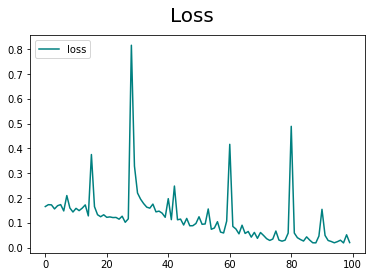

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

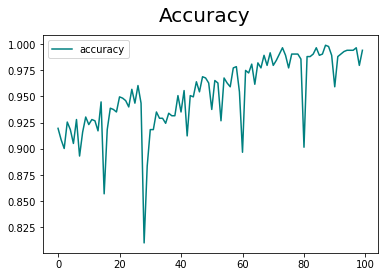

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)


In [ ]:
print("Precision : ")
print(pre.result().numpy())
print("\nRecall : ")
print(re.result().numpy())
print("\nAccuracy : ")
print(acc.result().numpy())

Precision : 
0.9230769

Recall : 
0.95238096

Accuracy : 
0.9375
